In [1]:
import pandas as pd
import numpy as np
import os
os.chdir("E://python")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
eq = pd.read_csv("Home Equity Loans.csv")

In [3]:
eq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


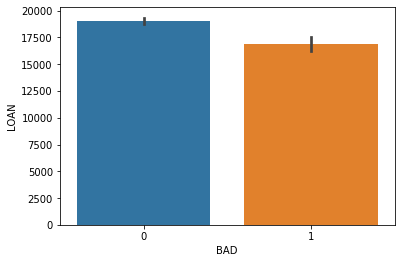

In [4]:
sns.barplot(x=eq['BAD'],y=eq['LOAN'])

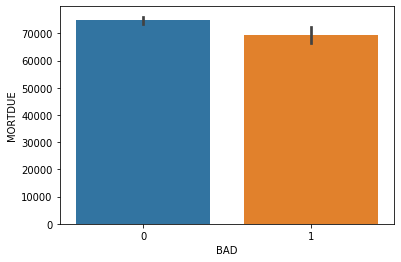

In [5]:
sns.barplot(x=eq['BAD'],y=eq['MORTDUE'])

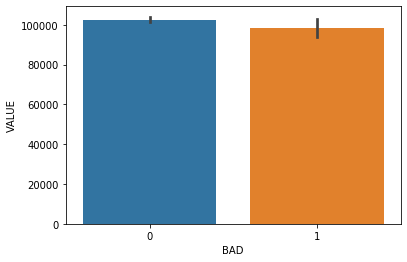

In [6]:
sns.barplot(x=eq['BAD'],y=eq['VALUE'])

In [7]:
(eq.isna().sum()/eq.count())*100

BAD         0.000000
LOAN        0.000000
MORTDUE     9.518559
VALUE       1.915185
REASON      4.414856
JOB         4.911107
YOJ         9.458219
DEROG      13.480579
DELINQ     10.780669
CLAGE       5.449398
NINQ        9.357798
CLNO        3.868944
DEBTINC    26.997656
dtype: float64

In [8]:
equity = eq.drop(['DEBTINC'],axis=1)

In [9]:
equity.head(3)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0


In [10]:
modval = int(equity['DEROG'].mode())
equity['DEROG'] = equity['DEROG'].fillna(modval)

modval1 = int(equity['DELINQ'].mode())
equity['DELINQ'] = equity['DELINQ'].fillna(modval1)

medval = int(equity['NINQ'].median())
equity['NINQ'] = equity['NINQ'].fillna(medval)

medval1 = int(equity['CLNO'].median())
equity['CLNO'] = equity['CLNO'].fillna(medval1)

medval2 = int(equity['YOJ'].median())
equity['YOJ'] = equity['YOJ'].fillna(medval2)


In [11]:
equity.dropna(axis=0,how='any',inplace=True)

In [12]:
(equity.isna().sum()/equity.count())*100

BAD        0.0
LOAN       0.0
MORTDUE    0.0
VALUE      0.0
REASON     0.0
JOB        0.0
YOJ        0.0
DEROG      0.0
DELINQ     0.0
CLAGE      0.0
NINQ       0.0
CLNO       0.0
dtype: float64

In [13]:
np.unique(equity['BAD'],return_counts=True)

(array([0, 1], dtype=int64), array([4016,  918], dtype=int64))

In [14]:
equity.skew()

BAD        1.613969
LOAN       1.966086
MORTDUE    1.804104
VALUE      1.899855
YOJ        1.038799
DEROG      6.097702
DELINQ     4.239463
CLAGE      1.502260
NINQ       2.534976
CLNO       0.830436
dtype: float64

In [15]:
equity.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0


In [16]:
equity1 = equity.copy()

In [17]:
eq_f = equity1[['REASON','JOB']]

In [18]:
eq_f = pd.get_dummies(eq_f,columns=['REASON','JOB'],drop_first=True)
eq_f.head(3)

,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,0,1,0,0,0
1,1,0,1,0,0,0
2,1,0,1,0,0,0


In [19]:
eq_f.reset_index(drop=True,inplace=True)

In [20]:
eq_f.head(3)

,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,0,1,0,0,0
1,1,0,1,0,0,0
2,1,0,1,0,0,0


In [21]:
eq_target = equity[['BAD']]
print(eq_target.shape)
#eq_target.isna().sum()

(4934, 1)


In [22]:
eq_v = equity1.drop(['REASON','JOB','BAD'],axis='columns')
print(eq_v.shape)
eq_v.head(3)

(4934, 9)


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0


In [23]:
eq_v.reset_index(drop=True,inplace=True)

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaled_d = scaler.fit_transform(eq_v)
scaled_df = pd.DataFrame(scaled_d,columns=eq_v.columns)
scaled_df.shape

(4934, 9)

In [27]:
print(eq_f.shape)
print(eq_v.shape)
print(scaled_df.shape)
print(eq_target.shape)

(4934, 6)
(4934, 9)
(4934, 9)
(4934, 1)


In [28]:
eq_final = pd.concat([eq_f,scaled_df],axis=1)
eq_final.head(3)
print(eq_final.shape)

(4934, 15)


In [29]:
#sns.heatmap(eq_final,annot=True)

In [30]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [31]:
os = SMOTE(random_state=2)

In [32]:
X_reshape,y_reshape = os.fit_sample(eq_final,eq_target)

In [33]:
#X_reshape,y_reshape = os.fit_sample(eq_final,eq_target)

In [34]:
np.unique(y_reshape,return_counts=True)

(array([0, 1], dtype=int64), array([4016, 4016], dtype=int64))

In [35]:
from sklearn.ensemble import IsolationForest

In [36]:
ic = IsolationForest(n_estimators=500,contamination=0.10)
iforest = ic.fit(X_reshape)

In [37]:
pred_if = iforest.predict(X_reshape)
pred_if

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
eq_outliers = X_reshape[iforest.predict(X_reshape)==-1]
eq_outliers.shape

(804, 15)

In [39]:
eq_final1 = X_reshape[iforest.predict(X_reshape)== 1]
eq_final1.reset_index(drop=True,inplace=True)
eq_final1.shape

(7228, 15)

In [40]:
eq_target1 = y_reshape[iforest.predict(X_reshape)== 1]
eq_target1.reset_index(drop=True,inplace=True)
eq_target1.shape

(7228, 1)

In [41]:
X = eq_final1
y = eq_target1

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5782, 15)
(5782, 1)
(1446, 15)
(1446, 1)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [46]:
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,RepeatedStratifiedKFold

In [47]:
#models.append(('KM',KMeans(n_clusters=5)))

In [48]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
#kfold = RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=1)

In [51]:
results = []
names = []
scoring = 'recall'

for name, model in models:
    kfold = KFold(n_splits=5,random_state=1,shuffle=True)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name,cv_results.mean(),cv_results.std())
    msg2 = (name,cv_results)
    #print("\n")
    #print(msg)
    #print(msg2)
    
model1 = pd.DataFrame(results)
model1.index = names
model1['Average'] = model1.mean(axis=1)
model_f=model1.sort_values(by='Average',ascending=False)
print(model_f)

             0         1         2         3         4   Average
RF    0.976190  0.964286  0.965096  0.961409  0.964974  0.966391
KNN   0.956044  0.955357  0.963351  0.951342  0.950963  0.955411
XGB   0.948718  0.946429  0.954625  0.942953  0.950963  0.948738
CART  0.877289  0.887500  0.900524  0.902685  0.879159  0.889431
SVM   0.802198  0.807143  0.804538  0.778523  0.789842  0.796449
LR    0.703297  0.687500  0.701571  0.661074  0.663748  0.683438
LDA   0.692308  0.683929  0.692845  0.652685  0.663748  0.677103
NB    0.507326  0.514286  0.497382  0.474832  0.464098  0.491585


In [52]:
results = []
names = []
scoring = 'roc_auc'

for name, model in models:
    kfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name,cv_results.mean(),cv_results.std())
    msg2 = (name,cv_results)
    #print("\n")
    #print(msg)
    #print(msg2)
    
model2 = pd.DataFrame(results)
model2.index = names
model2['Average'] = model2.mean(axis=1)
model_d=model2.sort_values(by='Average',ascending=False)
print(model_d)

             0         1         2         3         4         5         6  \
RF    0.997713  0.997300  0.997178  0.993201  0.995543  0.995826  0.996104   
KNN   0.992371  0.993949  0.996814  0.989181  0.993009  0.992313  0.995028   
XGB   0.994231  0.993568  0.996347  0.986425  0.988922  0.992632  0.992669   
CART  0.909861  0.901169  0.919221  0.911474  0.903252  0.893790  0.892702   
SVM   0.896291  0.867611  0.889061  0.860304  0.892663  0.889211  0.883535   
LR    0.821279  0.790759  0.806307  0.787927  0.810301  0.799131  0.817864   
LDA   0.820042  0.788472  0.801858  0.781747  0.807142  0.796486  0.813901   
NB    0.780000  0.771535  0.771861  0.748013  0.782789  0.772252  0.784910   

             7         8         9        10        11        12        13  \
RF    0.996148  0.996389  0.996063  0.996986  0.995421  0.995807  0.997687   
KNN   0.991214  0.994982  0.994469  0.991767  0.991291  0.996503  0.993385   
XGB   0.991240  0.994832  0.994153  0.993475  0.992355  0.99513

In [53]:
#RF model
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
RF_pred = RF_model.predict(X_test)

In [55]:
from sklearn import metrics as m

In [56]:
acc = m.accuracy_score(y_test,RF_pred)
acc

0.9778699861687413

In [57]:
cm = m.confusion_matrix(y_test,RF_pred)
cm

array([[743,   7],
       [ 25, 671]], dtype=int64)

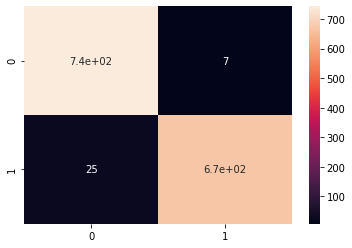

In [58]:
sns.heatmap(cm,annot=True)

In [59]:
print(m.classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       750
           1       0.99      0.96      0.98       696

    accuracy                           0.98      1446
   macro avg       0.98      0.98      0.98      1446
weighted avg       0.98      0.98      0.98      1446



In [60]:
knn = KNeighborsClassifier()

In [61]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
knn_pred = knn.predict(X_test)
acc_knn = m.accuracy_score(y_test,knn_pred)
acc_knn

0.9778699861687413

In [63]:
knn_params = {'algorithm':['auto','ball_tree','kd_tree','brute'],'metric':['minkowski','euclidean','manhattan','seuclidean'],
             'n_neighbors':[5,6,7,8],'weights':['uniform','distance']}

In [64]:
knn_gs = GridSearchCV(knn,param_grid=knn_params)

In [65]:
knn_gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'seuclidean'],
                         'n_neighbors': [5, 6, 7, 8],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [66]:
knn_gs.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [67]:
knn_gs_pred = knn_gs.predict(X_test)
acc_knn_gs = m.accuracy_score(y_test,knn_gs_pred)
acc_knn_gs

0.991701244813278

In [68]:
print(m.classification_report(y_test,knn_gs_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       750
           1       1.00      0.98      0.99       696

    accuracy                           0.99      1446
   macro avg       0.99      0.99      0.99      1446
weighted avg       0.99      0.99      0.99      1446



In [69]:
cm_knn = m.confusion_matrix(y_test,knn_gs_pred)
cm_knn

array([[750,   0],
       [ 12, 684]], dtype=int64)

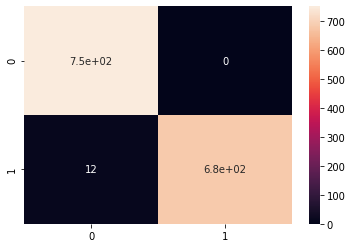

In [70]:
sns.heatmap(cm_knn,annot=True)

In [71]:
import pickle
with open('Home_equity_model.pickle','wb') as f:
    pickle.dump(knn_gs,f)